# Data Exploration of InsideAirbnb.com listings for NY and London


In [114]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [115]:
from rnd.domain.poc.city import AvailableCity
from rnd.rbnb.data_provider import load_rbnb_listing_data

ny_data = load_rbnb_listing_data(AvailableCity.NEW_YORK)
london_data = load_rbnb_listing_data(AvailableCity.LONDON)


In [116]:
# New York
print("\nNew York Listings - Info:")
# print(ny_data.info())
print(ny_data.head())



New York Listings - Info:
      id                         listing_url  \
0  39572  https://www.airbnb.com/rooms/39572   
1  39593  https://www.airbnb.com/rooms/39593   
2  39704  https://www.airbnb.com/rooms/39704   
3  42300  https://www.airbnb.com/rooms/42300   
4  42729  https://www.airbnb.com/rooms/42729   

                                                name  \
0                  1 br in a 2 br apt (Midtown West)   
1                  A lovely room w/ a Manhattan view   
2                   Private, Large & Sunny 1BR w/W&D   
3                     Beautiful Lower East Side Loft   
4  @HouseOnHenrySt - Private 2nd bedroom w/shared...   

                                         description  host_id  \
0                                                NaN   169927   
1  A private, furnished  large room to rent Jan/F...   110506   
2  It's a No Brainer:<br />•Terrific Space For Le...   170510   
3  Architect-owned loft is a corner unit in a bea...   184755   
4                     

In [117]:
print("\nLondon Listings - Info:")
print(london_data.info())


London Listings - Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95144 entries, 0 to 95143
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       95144 non-null  int64  
 1   listing_url              95144 non-null  object 
 2   name                     95144 non-null  object 
 3   description              92196 non-null  object 
 4   host_id                  95144 non-null  int64  
 5   host_is_superhost        95144 non-null  bool   
 6   neighbourhood_cleansed   95144 non-null  object 
 7   latitude                 95144 non-null  float64
 8   longitude                95144 non-null  float64
 9   property_type            95144 non-null  object 
 10  room_type                95144 non-null  object 
 11  accommodates             95144 non-null  int64  
 12  bathrooms                62744 non-null  float64
 13  bedrooms                 82794 non-null  float64
 1

In [118]:
all_listings = pd.concat([ny_data, london_data], ignore_index=True)
all_listings['data_status'] = all_listings.notna().all(axis=1).map({True: 'Complete', False: 'Incomplete'})


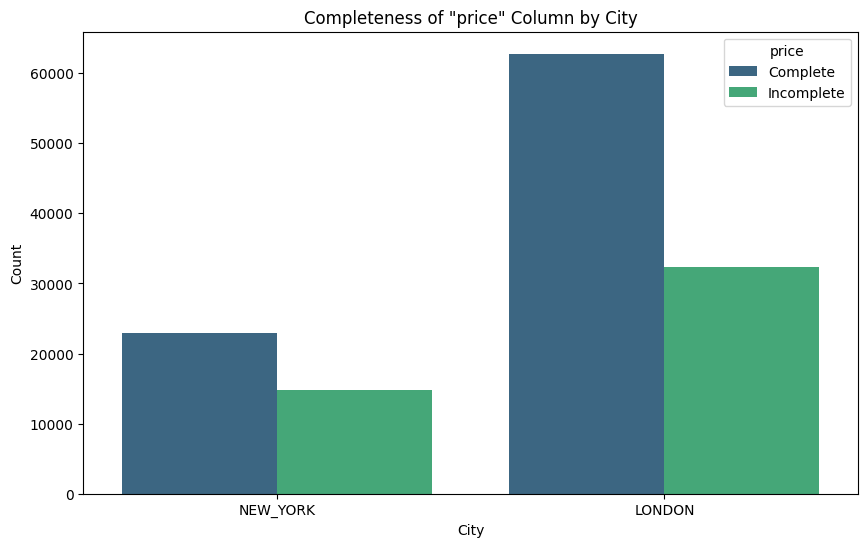

In [119]:
plt.figure(figsize=(10, 6))

sns.countplot(
    data=all_listings,
    x='city',
    hue=all_listings['price'].isna().map({True: 'Incomplete', False: 'Complete'}),
    palette='viridis'
)

plt.xlabel('City')
plt.ylabel('Count')
plt.title('Completeness of "price" Column by City')
plt.show()


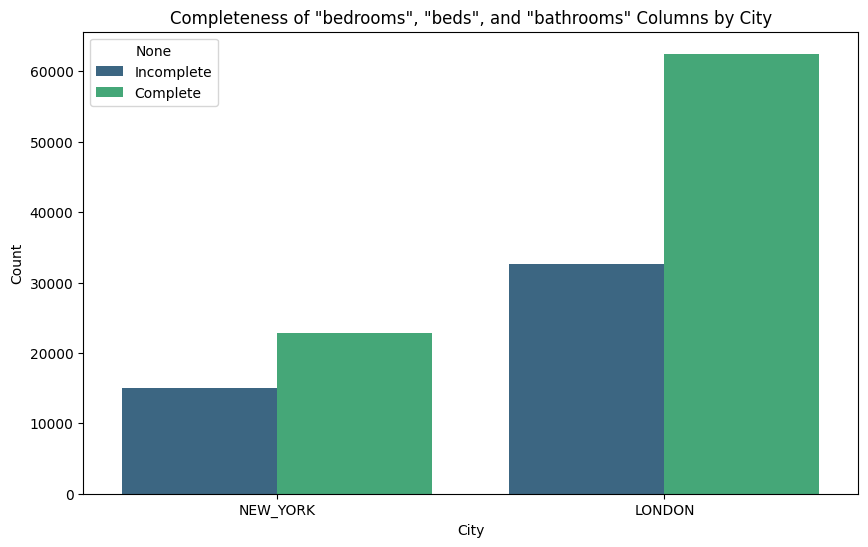

In [120]:
missing_bed_data = all_listings[['bedrooms', 'beds', 'bathrooms']].isna().any(axis=1)

plt.figure(figsize=(10, 6))

sns.countplot(
    data=all_listings,
    x='city',
    hue=missing_bed_data.map({True: 'Incomplete', False: 'Complete'}),
    palette='viridis'
)

plt.xlabel('City')
plt.ylabel('Count')
plt.title('Completeness of "bedrooms", "beds", and "bathrooms" Columns by City')
plt.show()


       city  count  nan_count        mean  median  min      max         std
0    LONDON  62777      32367  207.141581   134.0  1.0  80000.0  774.707797
1  NEW_YORK  22969      14813  195.224128   132.0  8.0  20000.0  353.251037


/var/folders/zk/ss0jnd753_q71r6vf8dgd0nm0000gn/T/ipykernel_22538/3518765710.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


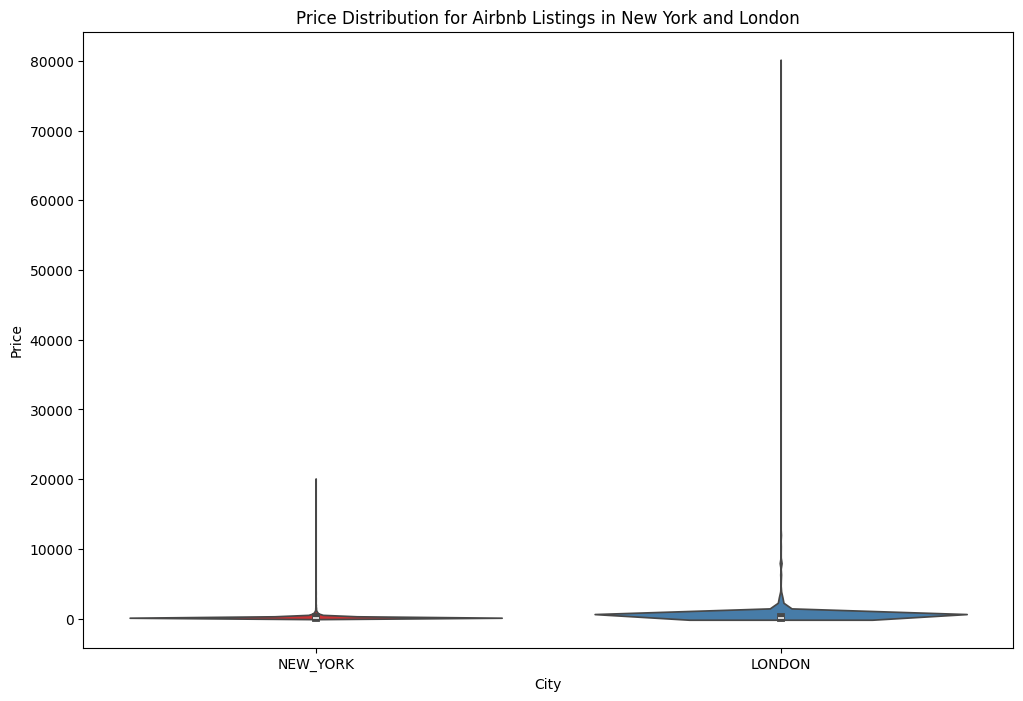

In [121]:
price_summary = all_listings.groupby('city')['price'].agg(
    count='count',
    nan_count=lambda x: x.isna().sum(),
    mean='mean',
    median='median',
    min='min',
    max='max',
    std='std'
).reset_index()
print(price_summary)



plt.figure(figsize=(12, 8))

sns.violinplot(
    data=all_listings,
    x='city',
    y='price',
    palette='Set1'
)

plt.xlabel('City')
plt.ylabel('Price')
plt.title('Price Distribution for Airbnb Listings in New York and London')

plt.show()


       city  count  nan_count        mean  median  min    max        std
0    LONDON  58480          0  144.559439   125.0  1.0  422.0  87.720125
1  NEW_YORK  21505          0  147.709509   125.0  8.0  422.0  88.972629


/var/folders/zk/ss0jnd753_q71r6vf8dgd0nm0000gn/T/ipykernel_22538/860953171.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(


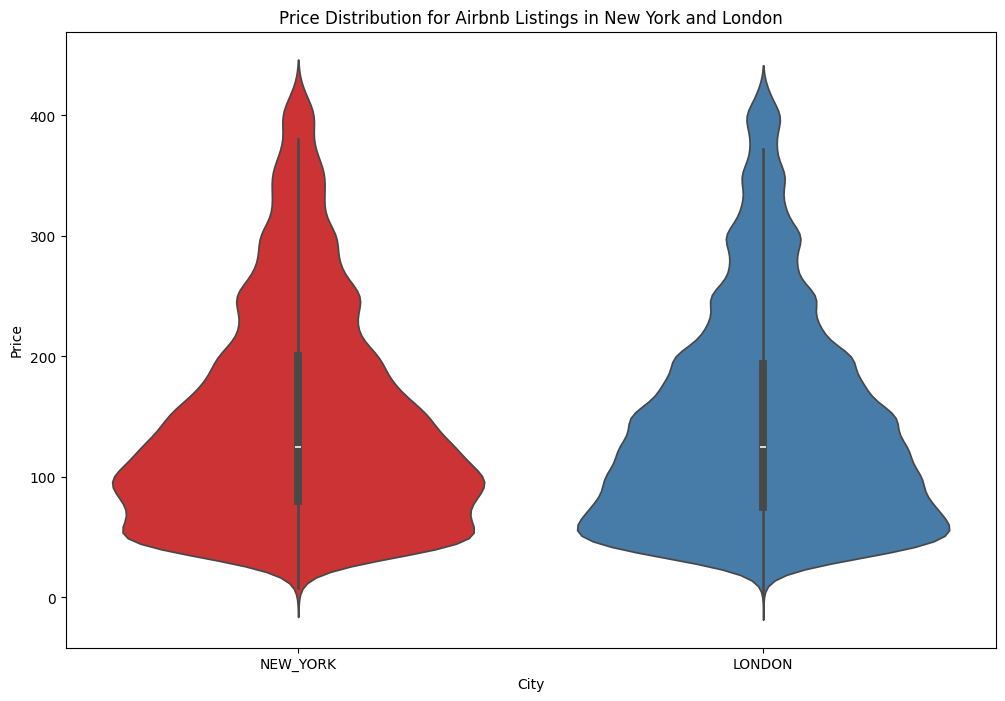

In [122]:
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

cleaned_listings = remove_outliers(all_listings, 'price')
price_summary = cleaned_listings.groupby('city')['price'].agg(
    count='count',
    nan_count=lambda x: x.isna().sum(),
    mean='mean',
    median='median',
    min='min',
    max='max',
    std='std'
).reset_index()
print(price_summary)

plt.figure(figsize=(12, 8))

sns.violinplot(
    data=cleaned_listings,
    x='city',
    y='price',
    palette='Set1'
)

plt.xlabel('City')
plt.ylabel('Price')
plt.title('Price Distribution for Airbnb Listings in New York and London')

plt.show()



In [123]:
import geopandas as gpd
import contextily as ctx
from shapely.geometry import Point
from rnd.rbnb.geospatial_features.transform import landmarks

def plot_map_with_price(df, city: AvailableCity):
    geometry = [Point(xy) for xy in zip(df['longitude'], df['latitude'])]
    gdf = gpd.GeoDataFrame(df, geometry=geometry, crs="EPSG:4326")
    fig, ax = plt.subplots(figsize=(10, 10))
    gdf.plot(column='price', cmap='viridis', legend=True, markersize=0.5, alpha=0.3, ax=ax)
    ctx.add_basemap(ax, crs=gdf.crs)

    if city_landmarks:= landmarks.get(city):
        landmark_df = gpd.GeoDataFrame(
            city_landmarks,
            geometry=[Point(lon, lat) for lon, lat in zip(
                [lm['longitude'] for lm in city_landmarks],
                [lm['latitude'] for lm in city_landmarks]
            )],
            crs="EPSG:4326"
        )
        landmark_df.plot(ax=ax, color='red', marker='*', markersize=100, label='Landmark')

        for _, row in landmark_df.iterrows():
            ax.text(row.geometry.x, row.geometry.y, row['name'], fontsize=8, ha='left', va='bottom', color='red')

    plt.title(f'Property Prices by Location in {city.name.replace("_"," ".capitalize())}')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
    plt.show()


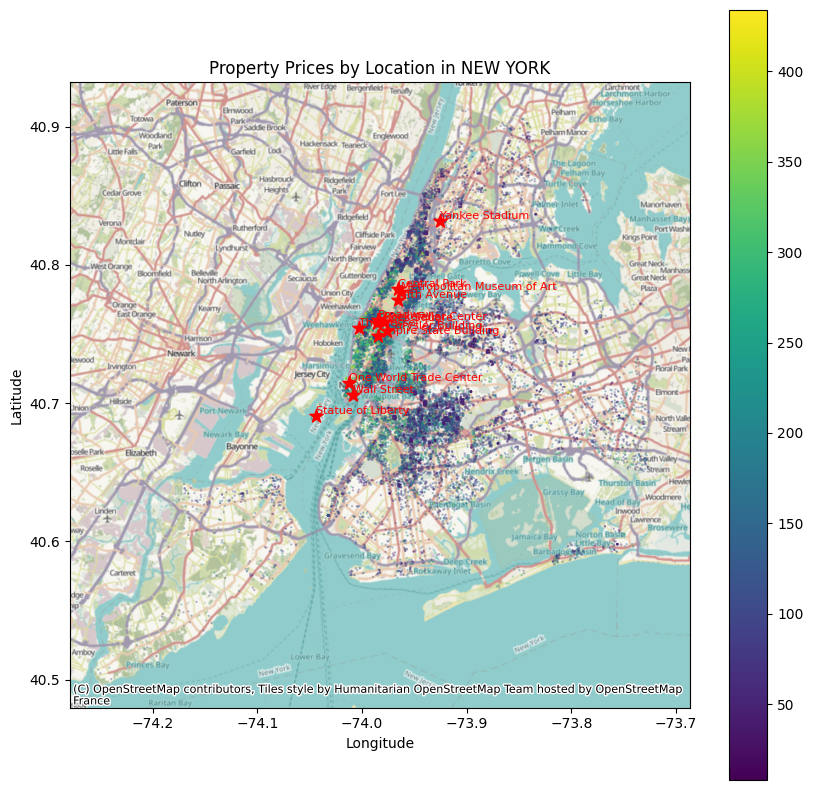

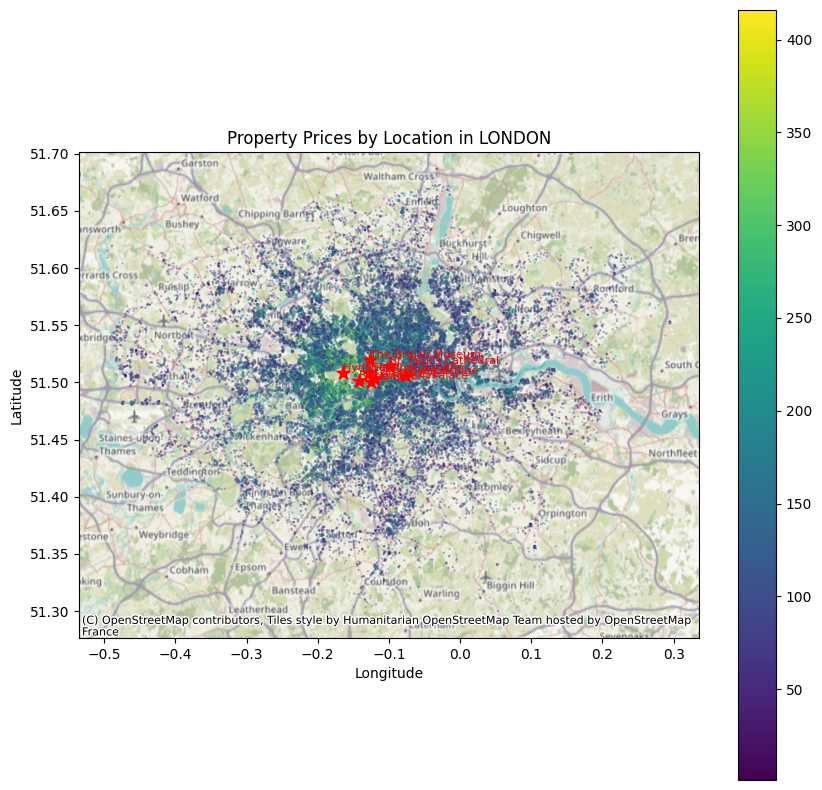

In [124]:
plot_map_with_price(remove_outliers(ny_data, 'price'), AvailableCity.NEW_YORK)
plot_map_with_price(remove_outliers(london_data, 'price'), AvailableCity.LONDON)


#### Categorical columns value exploration for NY and London

In [125]:
ny_data = ny_data.dropna(subset=['price'])
london_data = london_data.dropna(subset=['price'])

print(f"Shape of New York dataset after removing rows with missing price: {ny_data.shape}")
print(f"Shape of London dataset after removing rows with missing price: {london_data.shape}")

Shape of New York dataset after removing rows with missing price: (22969, 36)
Shape of London dataset after removing rows with missing price: (62777, 31)


In [126]:
from collections import Counter
categorical_columns = ['listing_url', 'name', 'description', 'host_is_superhost', 
                      'neighbourhood_cleansed', 'property_type', 'room_type',
                      'instant_bookable', 'city']

def explore_categorical_columns(df:pd.DataFrame, categorical_columns:list[str] = categorical_columns)->None:
    for col in categorical_columns:
        print(f"\n{col}:")
        print("\tNumber of unique values:", df[col].nunique())
        print("\tSample unique values:", df[col].unique()[:5])
        print("\tNumber of missing values:", df[col].isna().sum())
    print("-"*50)
    print("\nCounts of unique values in 'property_type':")
    for key,value in sorted(Counter(df['property_type']).items(), key=lambda x: x[1], reverse=True):
        print(f"{key}: {value}")
    print("\nCounts of unique values in 'neighbourhood_cleansed':")
    for key,value in sorted(Counter(df['neighbourhood_cleansed']).items(), key=lambda x: x[1], reverse=True):
        print(f"{key}: {value}")

In [127]:
explore_categorical_columns(ny_data)


listing_url:
	Number of unique values: 22969
	Sample unique values: ['https://www.airbnb.com/rooms/39572' 'https://www.airbnb.com/rooms/39593'
 'https://www.airbnb.com/rooms/42300' 'https://www.airbnb.com/rooms/42729'
 'https://www.airbnb.com/rooms/43105']
	Number of missing values: 0

name:
	Number of unique values: 22025
	Sample unique values: ['1 br in a 2 br apt (Midtown West)' 'A lovely room w/ a Manhattan view'
 'Beautiful Lower East Side Loft'
 '@HouseOnHenrySt - Private 2nd bedroom w/shared use'
 'Studio 3 blocks from Empire State Building']
	Number of missing values: 0

description:
	Number of unique values: 18444
	Sample unique values: [nan
 'A private, furnished  large room to rent Jan/Feb/25 in an apt unit w/ a city view, near the historic Sunnyside Garden. Subway #7, Q60 & Q32 bus lines in 1.5 blocs; easy transfer to E/F/N/G lines for midtown, downtown & Brooklyn. Availability uncertain from March on (please inquire within). Non-smoking, no-drinking, no-pet woman-to woman

In [128]:
explore_categorical_columns(london_data)


listing_url:
	Number of unique values: 62777
	Sample unique values: ['https://www.airbnb.com/rooms/56229' 'https://www.airbnb.com/rooms/62970'
 'https://www.airbnb.com/rooms/63948' 'https://www.airbnb.com/rooms/66772'
 'https://www.airbnb.com/rooms/69198']
	Number of missing values: 0

name:
	Number of unique values: 60478
	Sample unique values: ['Cosy Double studio in Zone 2 Hammersmith (1)'
 '3 Bedrm with Garden off Brick lane refurbd Oct24'
 'Cosy Double studio in Zone 2 Hammersmith (4)'
 'Cosy Double studio in Zone 2 Hammersmith (3)'
 'Spacious single room in quiet flat']
	Number of missing values: 0

description:
	Number of unique values: 52597
	Sample unique values: [nan
 "Recently renovated  (Oct 2024) warehouse conversion with considerable outside space. The apartment is moments from Brick Lane in Shoreditch! Spacious luxury 3 bedroom & 3 bathroom duplex/maisonette apartment in the centre of arguably London's trendiest & liveliest location. The apt is in Zone 1 and a 5 min wal

#### Preprocessing the categorical features

**neighbourhood_cleansed** - as this might indeed be impactful and informative combined with our geological data (latitude/longitude) we will use label encoding for that, as for both datasets we have quite a few values. Fortunately, we rather don't have a single representants for any subarea - they have at least couple hundred representants which is great for london dataset. On the other hand, NY dataset contains single representants, but we will treat them normally and see how it peerforms.

In [129]:
from sklearn.preprocessing import LabelEncoder

ny_neighbourhood_cleansed_label_encoder = LabelEncoder()
london_neighbourhood_cleansed_label_encoder = LabelEncoder()
ny_data['neighbourhood_cleansed'] = ny_neighbourhood_cleansed_label_encoder.fit_transform(ny_data['neighbourhood_cleansed'])
london_data['neighbourhood_cleansed'] = london_neighbourhood_cleansed_label_encoder.fit_transform(london_data['neighbourhood_cleansed'])


For `property_type` it makes perfect sense to combine it with descriptions, to assign it to one of the groups. For that We've chosen to start with predefined categories and choose the group with highest similarity for each observation. We've predefined couple groups based on initial investigation of the results for those texts.

In [130]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd

target_categories = {
    "Luxury": "A luxurious property with premium amenities, high-end furnishings, and exclusive features.",
    "Unique Stay": "A truly unconventional accommodation such as a tent, boat, camper, or other non-standard property. Typically not a traditional home or apartment.",
    "Shared": "A shared room in a rental unit or home, shared home,  where guests share common spaces like the kitchen or living room.",
    "Private Room": "A private room in a home or condo with its own bathroom or entrance.",
    "Entire Home/Apartment": "An entire rental unit, apartment, or condo with full privacy and amenities.",
    "Hotel/Commercial": "A room in a hotel, boutique hotel, or serviced apartment with professional services included (not nearby restaurants)."
}

def assign_property_type_to_df(df: pd.DataFrame, target_column_name: str, target_categories: dict[str,str] = target_categories):
    df['combined_text'] = df['property_type'] + " " + df['description'].fillna("")
    df[target_column_name] = assign_property_type(df, text_column='combined_text', target_categories=target_categories
    )
    df.drop(columns=['combined_text'], inplace=True)
    return df

def assign_property_type(df: pd.DataFrame, text_column : str, target_categories: dict[str,str] = target_categories):
    model = SentenceTransformer('all-MiniLM-L6-v2')

    category_embeddings = {category: model.encode(sentence) for category, sentence in target_categories.items()}
    text_embeddings = model.encode(df[text_column].fillna("").tolist(), show_progress_bar=True)

    def assign_category(embedding):
        similarities = {category: cosine_similarity([embedding], [category_embedding])[0][0]
                        for category, category_embedding in category_embeddings.items()}
        return max(similarities, key=similarities.get)

    return pd.Series([assign_category(embedding) for embedding in text_embeddings], index=df.index)

def print_labeling_results(data: pd.DataFrame, test_results: pd.Series):
    print("\nLabeling Results:")
    print("-" * 120)
    print(f"{'Index':<10} {'Property Type':<30} {'Assigned Category':<20} {'Description':<50}")
    print("-" * 120)
    for index, row in data.iterrows():
        print(f"{index:<10} {row['property_type']:<30} {test_results[index]:<20} {row['description']}")
        print("-" * 120)

Testing the implementation for labeling the luxury label of the dataset

In [131]:
test_data = ny_data.sample(10, random_state=42)
test_data['combined_text'] = test_data['property_type'] + " " + test_data['description'].fillna("")

test_results = assign_property_type(test_data, text_column='combined_text')

print_labeling_results(test_data, test_results)

Batches:   0%|          | 0/1 [00:00<?, ?it/s]


Labeling Results:
------------------------------------------------------------------------------------------------------------------------
Index      Property Type                  Assigned Category    Description                                       
------------------------------------------------------------------------------------------------------------------------
13807      Private room in home           Private Room         Spacious comfort in the heart of Brooklyn.<br />Elegantly renovated apartment. The entrance leads you to an open Kitchen and Living room to your left. Natural sun light exposure, wooden cabinetry & appliances. New wood floors and clean bathroom.
------------------------------------------------------------------------------------------------------------------------
21470      Tiny home                      Shared               Embrace comfort in our inviting Schuylerville Bronx studio, ideal for professionals or couples seeking an extended stay. Unwind on a

#### Labeling NY Data

In [132]:
ny_data = assign_property_type_to_df(ny_data, 'property_type_label')

Batches:   0%|          | 0/718 [00:00<?, ?it/s]


Labeling Results:
------------------------------------------------------------------------------------------------------------------------
Index      Property Type                  Assigned Category    Description                                       
------------------------------------------------------------------------------------------------------------------------
13807      Private room in home           Private Room         Spacious comfort in the heart of Brooklyn.<br />Elegantly renovated apartment. The entrance leads you to an open Kitchen and Living room to your left. Natural sun light exposure, wooden cabinetry & appliances. New wood floors and clean bathroom.
------------------------------------------------------------------------------------------------------------------------
21470      Tiny home                      Shared               Embrace comfort in our inviting Schuylerville Bronx studio, ideal for professionals or couples seeking an extended stay. Unwind on a

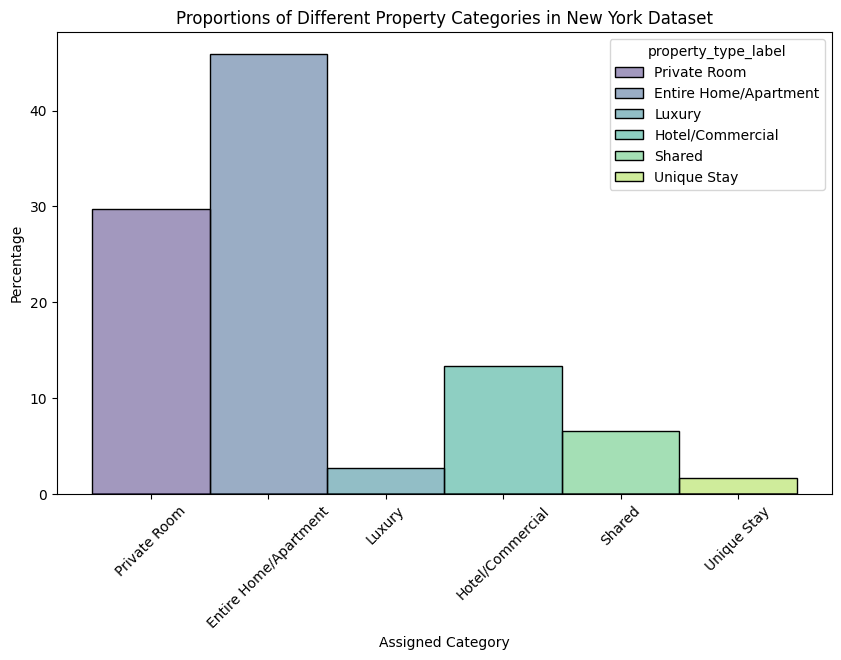

In [133]:
sample_ny_data = ny_data.sample(5, random_state=42)
print_labeling_results(sample_ny_data, ny_data['property_type_label'])

plt.figure(figsize=(10, 6))
sns.histplot(
    data=ny_data,
    x='property_type_label',
    stat='percent',
    discrete=True,
    hue='property_type_label',
    palette='viridis'
)
plt.xlabel('Assigned Category')
plt.ylabel('Percentage')
plt.title('Proportions of Different Property Categories in New York Dataset')
plt.xticks(rotation=45)
plt.show()

#### Labeling London Data

In [134]:
london_data = assign_property_type_to_df(london_data, 'property_type_label')

Batches:   0%|          | 0/1962 [00:00<?, ?it/s]


Labeling Results:
------------------------------------------------------------------------------------------------------------------------
Index      Property Type                  Assigned Category    Description                                       
------------------------------------------------------------------------------------------------------------------------
53855      Entire rental unit             Hotel/Commercial     Enjoy a stylish experience at this centrally-located place.<br /><br />Classy studio apartment located in the famous Notting Hill Area in London.<br /><br />This interior designed apartment is in a grand Victorian townhouse, on a beautiful and quiet tree-lined street<br /><br />One set of towels per person and one set of linen are provided.<br /><br />Feel free to send me a message even if your dates are not available on the calendar.<br /><br />I will do my best to help you.<br /><br />Looking forward to hosting you!
--------------------------------------

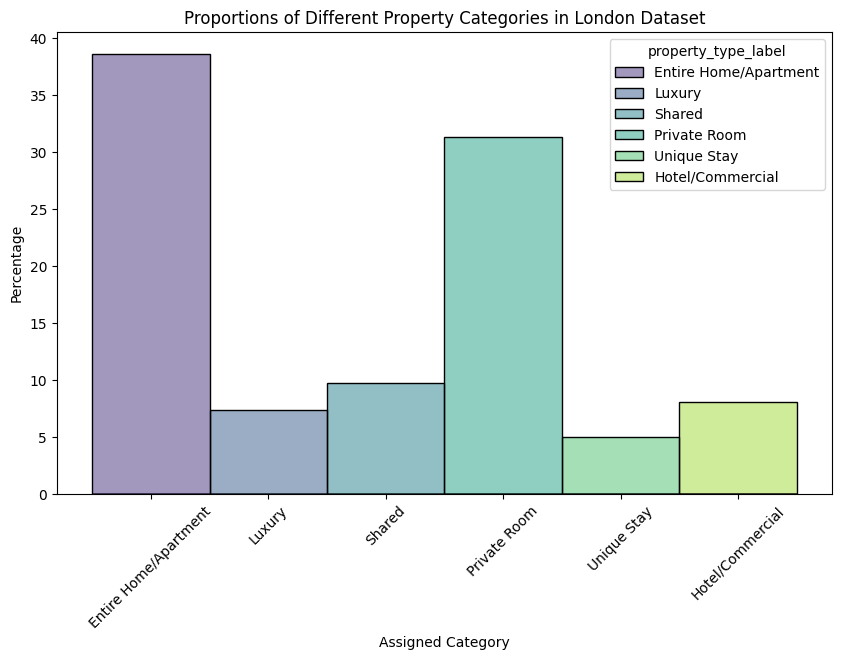

In [135]:
sample_london_data = london_data.sample(5, random_state=42)
print_labeling_results(sample_london_data, london_data['property_type_label'])

plt.figure(figsize=(10, 6))
sns.histplot(
    data=london_data,
    x='property_type_label',
    stat='percent',
    discrete=True,
    hue='property_type_label',
    palette='viridis'
)
plt.xlabel('Assigned Category')
plt.ylabel('Percentage')
plt.title('Proportions of Different Property Categories in London Dataset')
plt.xticks(rotation=45)
plt.show()

### Final data preprocessing and splitting into train and test sets prior to training models

In [151]:
from sklearn.preprocessing import LabelEncoder

ny_property_type_label_encoder = LabelEncoder()
london_property_type_label_encoder = LabelEncoder()
ny_room_type_label_encoder = LabelEncoder()
london_room_type_label_encoder = LabelEncoder()

ny_data['property_type_label'] = ny_property_type_label_encoder.fit_transform(ny_data['property_type_label'])
london_data['property_type_label'] = london_property_type_label_encoder.fit_transform(london_data['property_type_label'])
ny_data['room_type'] = ny_room_type_label_encoder.fit_transform(ny_data['room_type'])
london_data['room_type'] = london_room_type_label_encoder.fit_transform(london_data['room_type'])

In [152]:

columns_to_drop = ['property_type', 'description', 'id', 'host_id',"listing_url","name","city"]

X_ny = ny_data.drop(columns=columns_to_drop, errors='ignore')
X_ny = X_ny.drop(columns=['price'], errors='ignore')
y_ny = ny_data['price']


X_london = london_data.drop(columns=columns_to_drop, errors='ignore')
X_london = X_london.drop(columns=['price'], errors='ignore')
y_london = london_data['price']

#### Training LGMB and evaluating model

In [157]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import lightgbm as lgb

def train_and_evaluate(X, y, drop_null =False, test_size=0.2, random_state=42):
    if drop_null:
        X = X.dropna()
        y = y[X.index]
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    model = lgb.LGBMRegressor(num_boost_round=100, verbose=1)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    metrics = {
        "MAE": mean_absolute_error(y_test, y_pred),
        "MSE": mean_squared_error(y_test, y_pred),
        "R2 Score": r2_score(y_test, y_pred)
    }

    return model, metrics

In [172]:
print(train_and_evaluate(X_ny, y_ny)[1])
print(train_and_evaluate(X_ny, y_ny, drop_null=True)[1])

[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001980 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5211
[LightGBM] [Info] Number of data points in the train set: 18375, number of used features: 29
[LightGBM] [Info] Start training from score 193.802830
{'MAE': 85.60370612467366, 'MSE': 157402.74623985367, 'R2 Score': 0.20675656408271514}
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000887 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 5193
[LightG

In [171]:
print(train_and_evaluate(X_london, y_london)[1])
print(train_and_evaluate(X_london, y_london, drop_null=True)[1])

[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001560 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3834
[LightGBM] [Info] Number of data points in the train set: 50221, number of used features: 24
[LightGBM] [Info] Start training from score 205.550686
{'MAE': 114.84663138911856, 'MSE': 951875.8611463972, 'R2 Score': 0.022647335688544823}
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001257 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3821
[Light

### Training LightGBM on New York listing data without additional geospartial features

In [166]:
X_ny_without_geo_features = X_ny.loc[:, ~X_ny.columns.str.contains("dist", case=False)]
X_london_without_geo_features = X_london.loc[:, ~X_london.columns.str.contains("dist", case=False)]

print("London, Shape without geo features:", X_london_without_geo_features.shape)
print("New York, Shape without geo features:", X_ny_without_geo_features.shape)
print("London, Shape with geo features:", X_london.shape)
print("New York, Shape with geo features:", X_ny.shape)

London, Shape without geo features: (62777, 15)
New York, Shape without geo features: (22969, 15)
London, Shape with geo features: (62777, 24)
New York, Shape with geo features: (22969, 29)


In [170]:
print(train_and_evaluate(X_ny_without_geo_features, y_ny)[1])
print(train_and_evaluate(X_ny_without_geo_features, y_ny, drop_null=True)[1])

[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000884 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1641
[LightGBM] [Info] Number of data points in the train set: 18375, number of used features: 15
[LightGBM] [Info] Start training from score 193.802830
{'MAE': 85.53915712815055, 'MSE': 164452.3000492795, 'R2 Score': 0.17122978695170188}
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000763 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1623
[LightGB

In [169]:
print(train_and_evaluate(X_london_without_geo_features, y_london)[1])
print(train_and_evaluate(X_london_without_geo_features, y_london, drop_null=True)[1])

[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001354 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1539
[LightGBM] [Info] Number of data points in the train set: 50221, number of used features: 15
[LightGBM] [Info] Start training from score 205.550686
{'MAE': 113.09961084106506, 'MSE': 822786.429479781, 'R2 Score': 0.15519182507382068}
[LightGBM] [Warning] num_iterations is set=100, num_boost_round=100 will be ignored. Current value: num_iterations=100
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001059 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1526
[LightGB

### Further explorations

In [45]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sentence_transformers import SentenceTransformer
from sklearn.cluster import KMeans

/Users/filipdziurdzia/Desktop/Uni/Semestr 8/Eksploracja Danych/Data-Exploration/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [46]:
def preprocess_text(df):
    df = df.dropna(subset=['description'])
    return df[['description', 'price']].dropna()

descriptions_ny = preprocess_text(ny_data)
descriptions_london = preprocess_text(london_data)

In [47]:
print(len(descriptions_ny))
print(len(descriptions_london))

22580
61056


In [52]:
def lda_features(descriptions, num_topics=10):
    vectorizer = CountVectorizer(stop_words='english', max_features=5000)
    doc_term_matrix = vectorizer.fit_transform(descriptions['description'])
    
    lda_model = LatentDirichletAllocation(n_components=num_topics, random_state=42)
    lda_features = lda_model.fit_transform(doc_term_matrix)
    
    return pd.DataFrame(lda_features, columns=[f'topic_{i}' for i in range(num_topics)]), lda_model, vectorizer

lda_ny, lda_model_ny, vectorizer_ny = lda_features(descriptions_ny)
lda_london, lda_model_london, vectorizer_london = lda_features(descriptions_london)

print("LDA Topics (NYC):")
print(lda_ny)

print("LDA Topics (London):")
print(lda_london)

LDA Topics (NYC):
        topic_0   topic_1   topic_2   topic_3   topic_4   topic_5   topic_6  \
0      0.367493  0.002632  0.131719  0.002632  0.002632  0.172184  0.002632   
1      0.002174  0.002174  0.002175  0.002175  0.144167  0.668339  0.002174   
2      0.007144  0.007144  0.007144  0.007145  0.007143  0.007144  0.455298   
3      0.012502  0.887495  0.012500  0.012500  0.012500  0.012501  0.012500   
4      0.004547  0.004546  0.004546  0.615297  0.199948  0.152930  0.004547   
...         ...       ...       ...       ...       ...       ...       ...   
22575  0.005001  0.005001  0.005001  0.954991  0.005001  0.005001  0.005001   
22576  0.012500  0.012500  0.012501  0.887495  0.012501  0.012501  0.012501   
22577  0.127440  0.002041  0.105255  0.002041  0.002042  0.002041  0.002041   
22578  0.008338  0.008335  0.746894  0.008335  0.008336  0.008335  0.008335   
22579  0.983330  0.001852  0.001852  0.001853  0.001852  0.001852  0.001852   

        topic_7   topic_8   topic

In [53]:
import numpy as np

def get_top_words(lda_model, vectorizer, num_words=10):
    words = np.array(vectorizer.get_feature_names_out())
    for topic_idx, topic in enumerate(lda_model.components_):
        top_words = words[np.argsort(topic)][-num_words:][::-1]  # Sort and get top words
        print(f"Topic {topic_idx}: {', '.join(top_words)}")

# Extract most common words per topic
get_top_words(lda_model_ny, vectorizer_ny, num_words=10)

Topic 0: br, room, apartment, min, walk, kitchen, bedroom, bathroom, ave, floor
Topic 1: room, bed, kitchen, bedroom, apartment, bathroom, private, queen, tv, living
Topic 2: apartment, furnished, city, new, living, room, york, fully, kitchen, bedroom
Topic 3: place, located, stay, restaurants, close, apartment, enjoy, space, centrally, neighborhood
Topic 4: home, apartment, bedroom, fully, located, furnished, equipped, ll, love, living
Topic 5: br, brooklyn, park, restaurants, apartment, walk, building, beautiful, floor, located
Topic 6: br, square, park, central, times, building, new, manhattan, york, located
Topic 7: like, rent, community, best, room, offer, bed, way, spaces, offers
Topic 8: br, minutes, train, away, walk, manhattan, min, subway, 10, mins
Topic 9: apartment, perfect, city, home, stay, heart, modern, space, new, experience


In [ ]:
from sklearn.linear_model import LinearRegression

X = lda_ny  # Topic distribution per listing
y = descriptions_ny['price']  # Target variable (price)

model = LinearRegression()
model.fit(X, y)

# Get topic influence on price
topic_importance = pd.Series(model.coef_, index=[f'topic_{i}' for i in range(10)])
print(topic_importance.sort_values(ascending=False))


topic_5    198.606863
topic_6    110.703793
topic_9     56.112429
topic_4     33.239881
topic_1    -24.903768
topic_2    -29.957869
topic_7    -66.907624
topic_8    -79.468574
topic_3    -81.208039
topic_0   -116.217092
dtype: float64


In [ ]:
def bert_features(descriptions, num_clusters=10):
    model = SentenceTransformer('all-MiniLM-L6-v2')
    embeddings = model.encode(descriptions, show_progress_bar=True)
    
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    clusters = kmeans.fit_predict(embeddings)
    
    clusters_df = pd.DataFrame({'cluster': clusters})
    
    descriptions_reset = pd.Series(descriptions).reset_index(drop=True)
    clusters_df.reset_index(drop=True, inplace=True)

    return pd.concat([descriptions_reset, clusters_df], axis=1)


descriptions_ny_list = descriptions_ny['description'].tolist()
descriptions_london_list = descriptions_london['description'].tolist()



bert_ny = bert_features(descriptions_ny_list)
bert_london = bert_features(descriptions_london_list)


Batches: 100%|██████████| 1908/1908 [01:18<00:00, 24.37it/s] 


In [ ]:
display(bert_ny)

In [ ]:
ny_final = pd.concat([descriptions_ny.reset_index(drop=True), lda_ny, bert_ny], axis=1)
london_final = pd.concat([descriptions_london.reset_index(drop=True), lda_london, bert_london], axis=1)